## Career Con 2019 - Help Navigate Robots

## Abstrast

# MAKE WAY FOR ROBOTS

<img src = "robot_image.jpg">

## Data

## Acknowledgements

**SOURCE:** https://www.kaggle.com/c/career-con-2019/data

In [61]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from seaborn import countplot,lineplot, barplot
from statsmodels.formula.api import ols
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [62]:
# importing the dataset
df_X_train = pd.read_csv("X_train.csv")
df_y_train = pd.read_csv("y_train.csv")
df_X_test = pd.read_csv("X_test.csv")

In [63]:
df_y_train.head(5)

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles


In [64]:
df_y_train['row_id'] = df_y_train['series_id'].map(str) + "_" + df_y_train['group_id'].map(str)

In [65]:
df_y_train

,series_id,group_id,surface,row_id
0,0,13,fine_concrete,0_13
1,1,31,concrete,1_31
2,2,20,concrete,2_20
3,3,31,concrete,3_31
4,4,22,soft_tiles,4_22
5,5,1,tiled,5_1
6,6,34,soft_pvc,6_34
7,7,31,concrete,7_31
8,8,33,hard_tiles_large_space,8_33
9,9,11,tiled,9_11


In [66]:
df_X_train.shape

(487680, 13)

In [67]:
df_train_new = df_X_train.merge(df_y_train, left_on= 'row_id', right_on= 'row_id', how= 'inner')

In [68]:
df_train_new.shape

(3810, 16)

In [69]:
df_train_new.head(20)


,row_id,series_id_x,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,series_id_y,group_id,surface
0,0_13,0,13,-0.758460,-0.63445,-0.105040,-0.105730,-0.014728,0.001884,-0.010793,1.49780,1.62050,-7.8959,0,13,fine_concrete
1,1_31,1,31,-0.958720,0.24126,0.031578,-0.147120,-0.039057,-0.106040,0.099251,0.67933,4.49420,-6.1684,1,31,concrete
2,2_20,2,20,-0.510300,-0.84710,-0.130110,-0.071265,-0.077082,0.036941,0.011607,-0.65896,4.81690,-7.8647,2,20,concrete
3,3_31,3,31,-0.939110,0.30943,0.039416,-0.144150,-0.314720,0.003332,-0.016531,-0.83205,7.07000,-12.7680,3,31,concrete
4,4_22,4,22,-0.888190,0.43484,0.060909,-0.135410,0.006498,0.028206,-0.156950,-0.25021,1.00670,-9.3094,4,22,soft_tiles
5,5_1,5,1,0.464630,-0.87259,-0.126560,0.081713,0.068393,0.036116,-0.052071,2.45340,-0.17354,-8.0982,5,1,tiled
6,6_34,6,34,-0.404100,-0.90226,-0.141000,-0.052374,0.011542,0.015388,-0.074294,0.33826,3.56420,-9.1940,6,34,soft_pvc
7,7_31,7,31,-0.925910,0.34787,0.046748,-0.139630,-0.125090,-0.017950,-0.066322,-1.33550,3.02390,-9.0906,7,31,concrete
8,8_33,8,33,0.014229,-0.98892,-0.147390,0.010355,0.007687,-0.037034,0.087570,0.69434,2.65520,-9.2657,8,33,hard_tiles_large_space
9,9_11,9,11,0.818920,-0.55359,-0.077275,0.130150,0.109770,-0.210700,0.785620,-1.97340,3.39620,-11.2080,9,11,tiled


In [104]:
Xlog1 = df_train_new.iloc[:,:-3]
ylog1 = df_train_new.iloc[:,-1:]
print(Xlog1.shape,"  ",ylog1.shape)

(3810, 13)    (3810, 1)


In [94]:
X_train_log1, X_test_log1, y_train_log1, y_test_log1 = train_test_split(Xlog1, ylog1, test_size=0.2, random_state=0)

In [105]:
Xlog1.head()

,row_id,series_id_x,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_13,0,13,-0.75846,-0.63445,-0.105040,-0.105730,-0.014728,0.001884,-0.010793,1.49780,1.6205,-7.8959
1,1_31,1,31,-0.95872,0.24126,0.031578,-0.147120,-0.039057,-0.106040,0.099251,0.67933,4.4942,-6.1684
2,2_20,2,20,-0.51030,-0.84710,-0.130110,-0.071265,-0.077082,0.036941,0.011607,-0.65896,4.8169,-7.8647
3,3_31,3,31,-0.93911,0.30943,0.039416,-0.144150,-0.314720,0.003332,-0.016531,-0.83205,7.0700,-12.7680
4,4_22,4,22,-0.88819,0.43484,0.060909,-0.135410,0.006498,0.028206,-0.156950,-0.25021,1.0067,-9.3094


In [71]:
df_y_train['series_id'].unique()

array([   0,    1,    2, ..., 3807, 3808, 3809], dtype=int64)

In [106]:
ylog1.head()

,surface
0,fine_concrete
1,concrete
2,concrete
3,concrete
4,soft_tiles


In [73]:
df_X_test.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.025773,-0.98864,-0.14801,0.003350,-0.006524,-0.001071,-0.027390,0.10043,4.2061,-5.5439
1,0_1,0,1,-0.025683,-0.98862,-0.14816,0.003439,-0.113960,0.083987,-0.060590,-0.70889,3.9905,-8.0273
2,0_2,0,2,-0.025617,-0.98861,-0.14826,0.003571,-0.080518,0.114860,-0.037177,1.45710,2.2828,-11.2990
3,0_3,0,3,-0.025566,-0.98862,-0.14817,0.003609,0.070067,0.033820,-0.035904,0.71096,1.8582,-12.2270
4,0_4,0,4,-0.025548,-0.98866,-0.14792,0.003477,0.152050,-0.029016,-0.015314,3.39960,2.7881,-10.4100


In [74]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [107]:
missing_data(Xlog1)

,row_id,series_id_x,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
Total,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0,0,0
Types,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [76]:
missing_data(df_X_test)

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
Total,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0,0,0
Types,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [108]:
missing_data(ylog1)

,surface
Total,0
Percent,0
Types,object


In [109]:
Xlog1.describe()

,series_id_x,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,1904.500000,37.601312,-0.017956,0.074655,0.012404,-0.003803,-0.002250,0.008943,-0.020617,0.122643,2.997467,-9.352851
std,1099.996591,20.982743,0.685924,0.708222,0.106006,0.104355,0.117932,0.088011,0.229278,1.830807,2.040585,2.822452
min,0.000000,0.000000,-0.988810,-0.989590,-0.162780,-0.154430,-1.257700,-0.425230,-1.061900,-19.763000,-21.520000,-33.067000
25%,952.250000,19.000000,-0.703733,-0.688625,-0.089582,-0.106467,-0.041856,-0.032189,-0.093675,-0.550377,2.075775,-10.203500
50%,1904.500000,39.000000,-0.103655,0.237040,0.031804,-0.018473,-0.000003,0.006192,-0.005393,0.116595,2.950500,-9.359900
75%,2856.750000,55.000000,0.651253,0.810617,0.122840,0.097545,0.042063,0.049238,0.064443,0.825020,3.898850,-8.530225
max,3809.000000,72.000000,0.989000,0.988830,0.154650,0.153900,0.937800,0.539550,0.899340,15.499000,19.278000,22.899000


In [110]:
ylog1.describe()

,surface
count,3810
unique,9
top,concrete
freq,779


In [80]:
df_X_test.describe()

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
count,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000
mean,1907.500000,63.500000,0.031996,0.120651,0.018735,0.004024,0.000401,0.013669,-0.036101,0.125433,2.906588,-9.359811
std,1101.585403,36.949327,0.671977,0.714522,0.108481,0.100957,0.114485,0.089440,0.233791,1.832639,2.094727,2.802670
min,0.000000,0.000000,-0.989720,-0.989810,-0.154680,-0.156270,-2.403300,-1.193000,-1.458200,-35.040000,-107.480000,-83.173000
25%,953.750000,31.750000,-0.648130,-0.744503,-0.112660,-0.098435,-0.037396,-0.029865,-0.089842,-0.486233,2.052100,-10.125000
50%,1907.500000,63.500000,0.132910,0.397860,0.057271,0.022654,0.001107,0.007276,-0.008911,0.112490,2.900300,-9.361700
75%,2861.250000,95.250000,0.575270,0.803600,0.124770,0.083706,0.037827,0.051112,0.057876,0.727250,3.758000,-8.582075
max,3815.000000,127.000000,0.989320,0.988940,0.154250,0.152510,3.396600,1.150700,0.960280,36.628000,55.624000,59.633000


# Distribution of target feature - surface

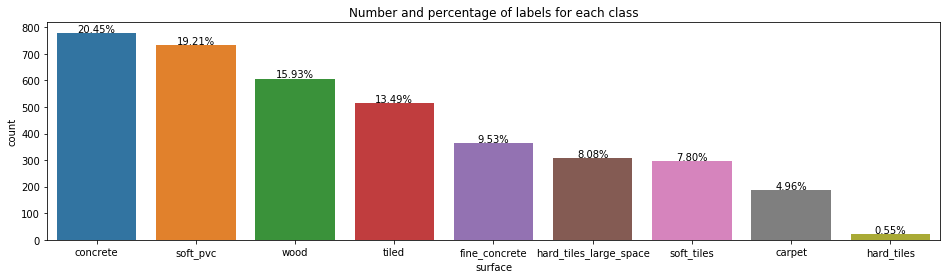

In [111]:
f, ax = plt.subplots(1,1, figsize=(16,4))
total = float(len(ylog1))
g = sns.countplot(ylog1['surface'], order = ylog1['surface'].value_counts().index)
g.set_title("Number and percentage of labels for each class")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(100*height/total),
            ha="center") 
plt.show()  

In [113]:
len(Xlog1.measurement_number.value_counts())

73

In [114]:
Xlog1.shape[0] / 73, df_X_test.shape[0] / 73

(52.19178082191781, 6691.068493150685)

Feature Engineering

In [115]:
def quaternion_to_euler(x, y, z, w):
    import math
    t0 = +2.0 * (w * x + y * z)
    t1 = +1.0 - 2.0 * (x * x + y * y)
    X = math.atan2(t0, t1)

    t2 = +2.0 * (w * y - z * x)
    t2 = +1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    Y = math.asin(t2)

    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (y * y + z * z)
    Z = math.atan2(t3, t4)

    return X, Y, Z

def fe(actual):
    new = pd.DataFrame()
    actual['total_angular_velocity'] = (actual['angular_velocity_X'] ** 2 + actual['angular_velocity_Y'] ** 2 + actual['angular_velocity_Z'] ** 2) ** 0.5
    actual['total_linear_acceleration'] = (actual['linear_acceleration_X'] ** 2 + actual['linear_acceleration_Y'] ** 2 + actual['linear_acceleration_Z'] ** 2) ** 0.5
    
    actual['acc_vs_vel'] = actual['total_linear_acceleration'] / actual['total_angular_velocity']
    
    x, y, z, w = actual['orientation_X'].tolist(), actual['orientation_Y'].tolist(), actual['orientation_Z'].tolist(), actual['orientation_W'].tolist()
    nx, ny, nz = [], [], []
    for i in range(len(x)):
        xx, yy, zz = quaternion_to_euler(x[i], y[i], z[i], w[i])
        nx.append(xx)
        ny.append(yy)
        nz.append(zz)
    
    actual['euler_x'] = nx
    actual['euler_y'] = ny
    actual['euler_z'] = nz
    
    actual['total_angle'] = (actual['euler_x'] ** 2 + actual['euler_y'] ** 2 + actual['euler_z'] ** 2) ** 5
    actual['angle_vs_acc'] = actual['total_angle'] / actual['total_linear_acceleration']
    actual['angle_vs_vel'] = actual['total_angle'] / actual['total_angular_velocity']
    
    def f1(x):
        return np.mean(np.diff(np.abs(np.diff(x))))
    
    def f2(x):
        return np.mean(np.abs(np.diff(x)))
    
    for col in actual.columns:
        if col in ['row_id', 'series_id', 'measurement_number']:
            continue
        new[col + '_mean'] = actual.groupby(['series_id'])[col].mean()
        new[col + '_min'] = actual.groupby(['series_id'])[col].min()
        new[col + '_max'] = actual.groupby(['series_id'])[col].max()
        new[col + '_std'] = actual.groupby(['series_id'])[col].std()
        new[col + '_max_to_min'] = new[col + '_max'] / new[col + '_min']
        
        # Change. 1st order.
        new[col + '_mean_abs_change'] = actual.groupby('series_id')[col].apply(f2)
        
        # Change of Change. 2nd order.
        new[col + '_mean_change_of_abs_change'] = actual.groupby('series_id')[col].apply(f1)
        
        new[col + '_abs_max'] = actual.groupby('series_id')[col].apply(lambda x: np.max(np.abs(x)))
        new[col + '_abs_min'] = actual.groupby('series_id')[col].apply(lambda x: np.min(np.abs(x)))

    return new


In [116]:
le = LabelEncoder()
ylog1['surface'] = le.fit_transform(ylog1['surface'])

In [117]:
Xlog1.fillna(0, inplace = True)
df_X_test.fillna(0, inplace = True)

In [118]:
Xlog1.replace(-np.inf, 0, inplace = True)
Xlog1.replace(np.inf, 0, inplace = True)
df_X_test.replace(-np.inf, 0, inplace = True)
df_X_test.replace(np.inf, 0, inplace = True)

-------------------- 0 --------------------
score  0.95822454308094


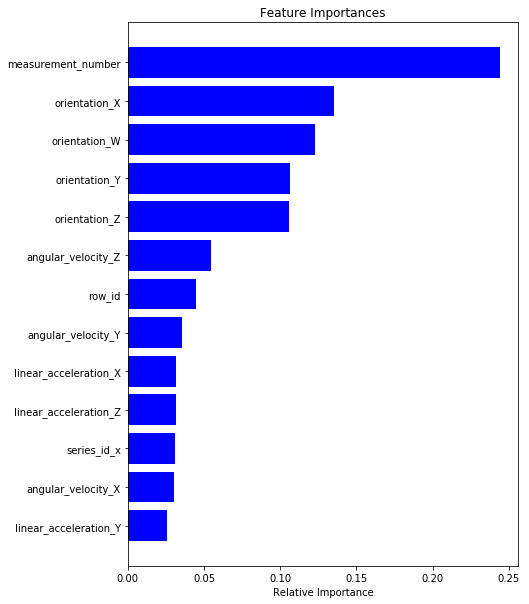

-------------------- 1 --------------------
score  0.9660130718954248


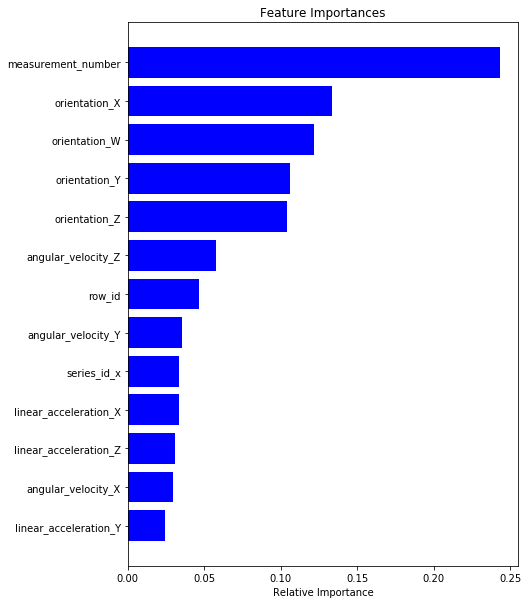

-------------------- 2 --------------------
score  0.9566929133858267


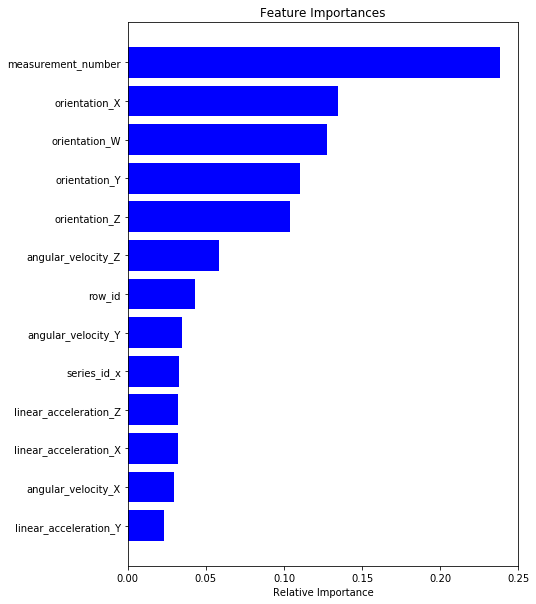

-------------------- 3 --------------------
score  0.9631578947368421


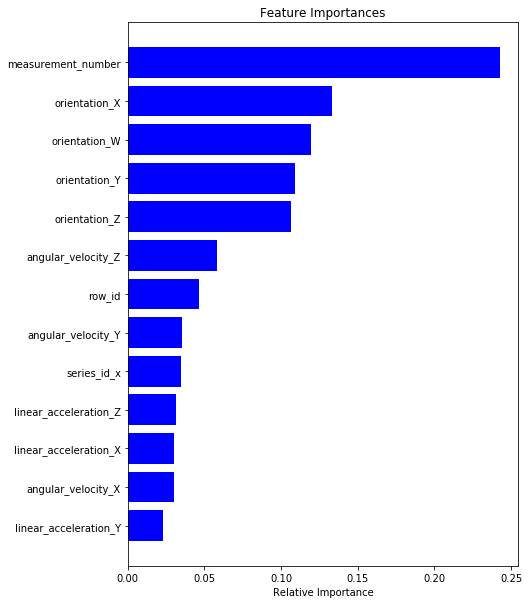

-------------------- 4 --------------------
score  0.9590488771466315


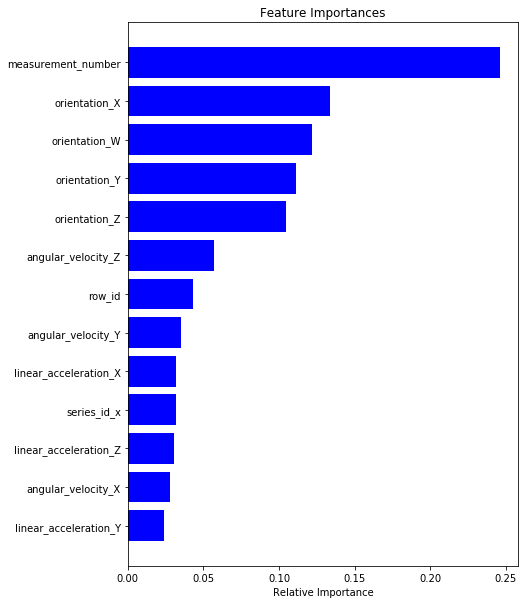

Avg Accuracy 0.960627460049133


In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=546789)
sub_preds_rf = np.zeros((df_X_test.shape[0], 9))
oof_preds_rf = np.zeros((Xlog1.shape[0]))
score = 0
for i, (train_index, test_index) in enumerate(folds.split(Xlog1, ylog1['surface'])):
    print('-'*20, i, '-'*20)
    
    clf =  RandomForestClassifier(n_estimators = 200, n_jobs = -1)
    clf.fit(Xlog1.iloc[train_index], ylog1['surface'][train_index])
    oof_preds_rf[test_index] = clf.predict(Xlog1.iloc[test_index])
    sub_preds_rf += clf.predict_proba(df_X_test) / folds.n_splits
    score += clf.score(Xlog1.iloc[test_index], ylog1['surface'][test_index])
    print('score ', clf.score(Xlog1.iloc[test_index], ylog1['surface'][test_index]))
    importances = clf.feature_importances_
    indices = np.argsort(importances)
    features = Xlog1.columns

    hm = 30
    plt.figure(figsize=(7, 10))
    plt.title('Feature Importances')
    plt.barh(range(len(indices[:hm])), importances[indices][:hm], color='b', align='center')
    plt.yticks(range(len(indices[:hm])), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

print('Avg Accuracy', score / folds.n_splits)
